<a href="https://colab.research.google.com/github/Gracie-hmr/new-repository/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22mipt_face_verification_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание человека по лицу с использованием библиотеки [dlib](http://dlib.net/).


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Сохранить копию на Диске). Свою копию вы сможете изменять и запускать.

Учебный курс "Быстрый старт в искусственный интеллект" для учителей школ.



Подключаем необходимые библиотеки

In [ ]:
import dlib
import cv2
import matplotlib.pyplot as plt
from skimage import io
from scipy.spatial import distance
%matplotlib inline

## Загружаем предварительно обученные сети

Сеть для выделения 68 ключевых точек на лице

In [ ]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2 -O shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -d shape_predictor_68_face_landmarks.dat.bz2

--2022-07-31 16:54:36--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  28.8MB/s    in 2.1s    

2022-07-31 16:54:38 (28.8 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]

bzip2: Output file shape_predictor_68_face_landmarks.dat already exists.


Сеть для распознавания лица

In [ ]:
!wget http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2 -O dlib_face_recognition_resnet_model_v1.dat.bz2
!bzip2 -d dlib_face_recognition_resnet_model_v1.dat.bz2

--2022-07-31 16:54:38--  http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21428389 (20M)
Saving to: ‘dlib_face_recognition_resnet_model_v1.dat.bz2’

dlib_face_recogniti 100%[===================>]  20.44M  19.6MB/s    in 1.0s    

2022-07-31 16:54:39 (19.6 MB/s) - ‘dlib_face_recognition_resnet_model_v1.dat.bz2’ saved [21428389/21428389]

bzip2: Output file dlib_face_recognition_resnet_model_v1.dat already exists.


## Создает объекты для поиска и распознавания лица

In [ ]:
detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('dlib_face_recognition_resnet_model_v1.dat')


RuntimeError: ignored

## Загружаем демонстрационные фотографии

Замените ссылки и имена файлов на фотографии, которые вы хотите обработать

In [ ]:
# Первое фото
photo1_download_link = 'https://github.com/sozykin/dlpython_course/raw/master/computer_vision/foto_comparison/sozykin_passport.jpg'
photo1_file_name = 'sozykin_passport.jpg'
# Второе фото
photo2_download_link = 'https://github.com/sozykin/dlpython_course/raw/master/computer_vision/foto_comparison/sozykin_webcam.jpg'
photo2_file_name = 'sozykin_webcam.jpg'

In [ ]:
!wget $photo1_download_link
!wget $photo2_download_link

--2022-07-31 16:54:41--  https://github.com/sozykin/dlpython_course/raw/master/computer_vision/foto_comparison/sozykin_passport.jpg
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sozykin/dlpython_course/master/computer_vision/foto_comparison/sozykin_passport.jpg [following]
--2022-07-31 16:54:41--  https://raw.githubusercontent.com/sozykin/dlpython_course/master/computer_vision/foto_comparison/sozykin_passport.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60808 (59K) [image/jpeg]
Saving to: ‘sozykin_passport.jpg.1’

sozykin_passport.jp 100%[===================>]  59.38K  --.-KB/s    i

Проверяем, что фотографии загружены

In [ ]:
!ls

dlib_face_recognition_resnet_model_v1.dat      sozykin_passport.jpg
dlib_face_recognition_resnet_model_v1.dat.bz2  sozykin_passport.jpg.1
sample_data				       sozykin_webcam.jpg
shape_predictor_68_face_landmarks.dat	       sozykin_webcam.jpg.1
shape_predictor_68_face_landmarks.dat.bz2


## Показываем загруженные фотографии

In [ ]:
photo1 = io.imread(photo1_file_name)
photo2 = io.imread(photo2_file_name)

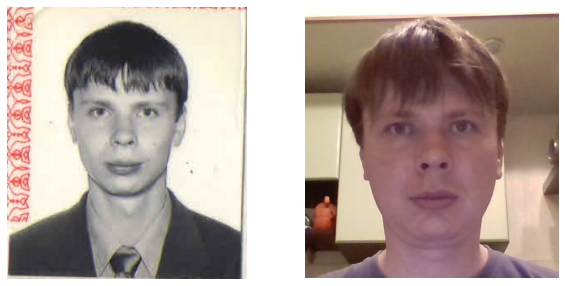

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121); plt.imshow(photo1); plt.axis('off');
plt.subplot(122); plt.imshow(photo2); plt.axis('off');
plt.show()

## Ищем лица на фотографиях

Определяем лица

In [ ]:
dets1 = detector(photo1, 1)
dets2 = detector(photo2, 1)

In [ ]:
if len(dets1) < 1:
  print('Error! No faces were found on the first photo')
else:
  fb1 = dets1[0]  

In [ ]:
if len(dets2) < 1:
  print('Error! No faces were found on the second photo')
else:
  fb2 = dets2[0] 

Рисуем прямоугольники вокруг лиц

In [ ]:
# Create copy of original photos
photo1_display = photo1.copy()
photo2_display = photo2.copy()
# Draw rectangles using OpenCV
photo1_display = cv2.rectangle(photo1_display, (fb1.left(), fb1.top()), (fb1.right(),fb1.bottom()), (255,0,0), 2)
photo2_display = cv2.rectangle(photo2_display, (fb2.left(), fb2.top()), (fb2.right(),fb2.bottom()), (255,0,0), 2)

Показываем найденные лица

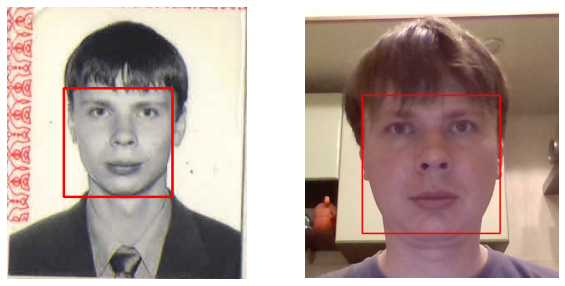

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121); plt.imshow(photo1_display); plt.axis('off');
plt.subplot(122); plt.imshow(photo2_display); plt.axis('off');
plt.show()

## Ищем ключевые точки лиц

Ищем ключевые точки с помощью предварительно обученной модели

In [ ]:
shape1 = sp(photo1, fb1)
shape2 = sp(photo2, fb2)

Рисуем ключевые точки на фото

In [ ]:
for i in range(0, 5):
    cv2.circle(photo1_display, (shape1.part(i).x, shape1.part(i).y), 2, (0,255,0), -1)
    cv2.circle(photo2_display, (shape2.part(i).x, shape2.part(i).y), 2, (0,255,0), -1)

Показываме фото с ключевыми точками

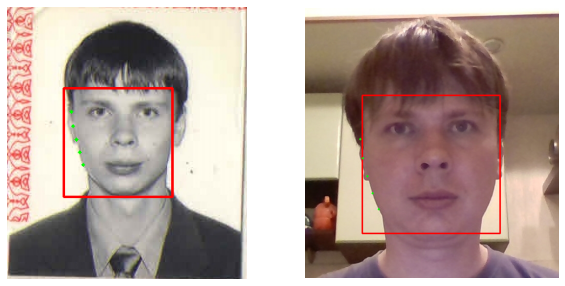

In [ ]:
plt.figure(figsize = (10,5))
plt.subplot(121); plt.imshow(photo1_display); plt.axis('off');
plt.subplot(122); plt.imshow(photo2_display); plt.axis('off');
plt.show()

## Извлекаем дескрипторы из лиц

Дескриптор - это вектор числе, соответствующий изображению, создаваемый с помощью предварительно обученной нейронной сети. Дескрипторы из фотографий одного человека похожи друг на друга. 




In [ ]:
face_descriptor1 = facerec.compute_face_descriptor(photo1, shape1)
face_descriptor2 = facerec.compute_face_descriptor(photo2, shape2)

Предварительно обученная сеть создает дексрипторы размером 128 чисел

In [ ]:
print("The size of the first descriptor: ", len(face_descriptor1))
print("First 15 elements of the first descriptor: ", face_descriptor1[0:15])

In [ ]:
print("The size of the second descriptor: ", len(face_descriptor2))
print("First 15 elements of the second descriptor: ", face_descriptor2[0:15])

## Сравнение дескрипторов

Чтобы сравнивать лица, нам необходим метод сравнения дексрипторов, извлеченных из фотографи. Разработчики библиотеки `dlib` используют для сравнения Евклидово расстояние. [Если Евклидово расстояние между двумя векторами, извлеченными из фотографий, меньше, чем 0.6, то фотографии принадлежат одному человеку](http://dlib.net/face_recognition.py.html).

In [ ]:
d = distance.euclidean(face_descriptor1, face_descriptor2)

In [ ]:
print("Евклидово расстояние между векторами:", d)

In [ ]:
threshold = 0.6

In [ ]:
if d < threshold:
    print("На фотографиях один человек")
else:
    print("На фотографиях разные люди")